# What would happen if a projectile changed mass and size in midair (density remains constant)?

## Looking at the motion separately first

## 1. For a lighter projectile
For a spherical 10 lb (4.5kg) iron cannonball the radius will be 5.15 cm (that seemed tiny to me but after further reseach it turns out that cast iron is just really dense)

The range was: 208.2857539376702 m
The maximum height was: 9.98433903907647 m


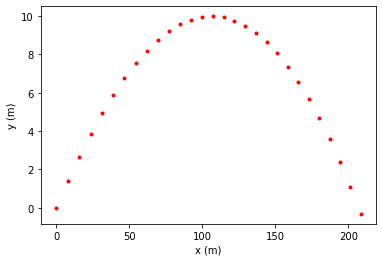

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
M = 4.5           # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
ang = 10       # Angle of initial velocity in degrees
ro = 1.225       # Air density at sea level (kg/m^3)
A = 0.00833          # Cross sectional area of projectile (m)
cd = 0.5         # Drag coefficient
dt = 0.1         # time step in s

Cd = (0.5)*ro*A*cd #Intermidiate step to combine all the constants in the drag equation for simplicity


# Set up the lists to store variables
# Initialize the velocity and position at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]
x = [0]                         # list for x and y position
y = [0]

# Drag force
drag=Cd*V**2

# Acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M ]          
ay = [-g-(drag*np.sin(ang/180*np.pi)/M) ]

## Leave this out for students to try
# We can choose to have better control of the time-step here
#dt = 0.2

# Use Euler method to update variables
counter = 0
while (y[counter] >= 0):                   # Check that the last value of y is >= 0
    t.append(t[counter]+dt)                # increment by dt and add to the list of time 
    
    
    
    # Update velocity
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])

    # Update position
    x.append(x[counter]+dt*vx[counter])    
    y.append(y[counter]+dt*vy[counter])    

    # With the new velocity calculate the drag force and update acceleration
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force 
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)     
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))
    
    # Increment the counter by 1
    counter = counter +1

# Plotting the trajectory
plt.plot(x,y,'r.')
plt.ylabel("y (m)")
plt.xlabel("x (m)")

print('The range was:', max(x),'m')
print('The maximum height was:', max(y),'m')

## 2. For a heavier projectile
For an 80 lb (36.3 kg) sphereical cannonball the radius will be 10.32cm

The range was: 221.75021371213916 m
The maximum height was: 10.257533304172862 m


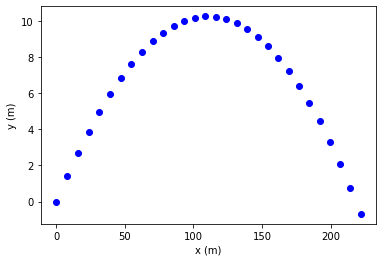

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
M = 36.3         # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
ang = 10      # Angle of initial velocity in degrees
ro = 1.225       # Air density at sea level (kg/m^3)
A = 0.033        # Cross sectional area of projectile (m)
cd = 0.5         # Drag coefficient
dt = 0.1         # time step in s

Cd = (0.5)*ro*A*cd #Intermidiate step to combine all the constants in the drag equation for simplicity


# Set up the lists to store variables
# Initialize the velocity and position at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]
x = [0]                         # list for x and y position
y = [0]

# Drag force
drag=Cd*V**2

# Acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M ] #Mass doesn't effect the actual drag force but it does affect acceleration since F=ma    
ay = [-g-(drag*np.sin(ang/180*np.pi)/M) ]


# Use Euler method to update variables
counter = 0
while (y[counter] >= 0):                   # Check that the last value of y is >= 0
    t.append(t[counter]+dt)                # increment by dt and add to the list of time 
    
    
    
    # Update velocity
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])

    # Update position
    x.append(x[counter]+dt*vx[counter])    
    y.append(y[counter]+dt*vy[counter])    

    # With the new velocity calculate the drag force and update acceleration
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force 
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)     
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))
    
    # Increment the counter by 1
    counter = counter +1

# Plotting the trajectory
plt.plot(x,y,'bo')
plt.ylabel("y (m)")
plt.xlabel("x (m)")

print('The range was:', max(x),'m')
print('The maximum height was:', max(y),'m')

## Interpretation of Results
When it is in the air it has the the force of gravity pulling it down and the drag force pulling it opposite the direction of motion. From Newton's second law, F=ma. When the mass and size increase, the acceleration due to gravity still remains the same since Fg = mg so a = mg/g = g. The acceleration due to drag will decrease because Fd = Cd(v^2) so ad = Cd(v^2)/m where Cd = 0.5(cd)(ro)(A). The mass increases by 8x but the cross sectional area only increases 4x the remaining variables remain constant. Therefore the acceleration due to drag actually decreases by 1/2. Therefore in this case the increase in mass and size does not actually behave like a parachute, in fact almost the reverse is true. This result depends strongly on the shape of the object before and after the mass increase.

## Putting it all together

You can set the inital and final masses and cross sectional areas and the time that the object expands in the code below

Note: This assumes the projectile is a sphere

Note 2: If you choose a time for the projectile to expand that is after the projectile has landed, the graph will look really strange, try an shorter time. I found that for an inial velocity of 80 and an angle of 10 that T needed to be less than 3

The range was: 209.45031739368235 m
The maximum height was: 9.98433903907647 m


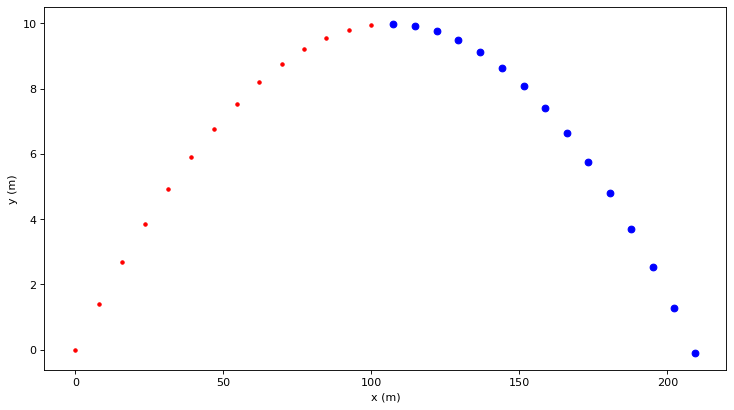

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
ang = 10.0       # Angle of initial velocity in degrees
ro = 1.225       # Air density at sea level (kg/m^3)
cd = 0.5         # Drag coefficient

#------------------------------------------------------#
# SET THESE TO THE VALUES YOU WANT
dt = 0.1          # time step in s
T = 1.4            # time after launch in sec when the projectile expands
M1 = 4.5          # Initial Mass of projectile in kg
A1 = 0.00833      # Initial Cross sectional area of projectile (m)
M2 = 36.3          # Final Mass of projectile in kg
A2 = 0.033      # Final Cross sectional area of projectile (m)
#------------------------------------------------------#

M = M1
Cd = (0.5)*ro*A1*cd #Intermidiate step to combine all the constants in the drag equation for simplicity

# Set up the lists to store variables
# Initialize the velocity and position at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]
x = [0]                         # list for x and y position
y = [0]

# Drag force
drag=Cd*V**2

# Acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M ]          
ay = [-g-(drag*np.sin(ang/180*np.pi)/M) ]

# Use Euler method to update variables
counter = 0
while (t[counter] <=T):                  # Time that projectile expands
    t.append(t[counter]+dt)                # increment by dt and add to the list of time 
    
    # Update velocity
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])

    # Update position
    x.append(x[counter]+dt*vx[counter])    
    y.append(y[counter]+dt*vy[counter])    

    # With the new velocity calculate the drag force and update acceleration
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force 
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)     
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))
    
    # Increment the counter by 1
    counter = counter +1
count1 = counter

# Plotting the trajectory of the first half
from matplotlib.pyplot import figure
figure(figsize=(11, 6), dpi=80)
plt.plot(x,y,'r.')
plt.ylabel("y (m)")
plt.xlabel("x (m)")

#Update mass and cross sectional area for the 80lb projectile
M = M2
Cd = (0.5)*ro*A2*cd


while (y[counter] >=0):                 
    t.append(t[counter]+dt)                # increment by dt and add to the list of time 
    
    # Update velocity
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])

    # Update position
    x.append(x[counter]+dt*vx[counter])    
    y.append(y[counter]+dt*vy[counter])    

    # With the new velocity calculate the drag force and update acceleration
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force 
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)     
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))
    
    # Increment the counter by 1
    counter = counter +1

# Plotting the trajectory
plt.plot(x[count1:],y[count1:],'bo')
plt.ylabel("y (m)")
plt.xlabel("x (m)")

print('The range was:', max(x),'m')
print('The maximum height was:', max(y),'m')